# The Colonial Origins of Comparative Development: An Empirical Investigation 

*******************************************************************
*Demetria Parisi*
*Francesca Ventimiglia*
*Sila Sahin*



******************************************************************* 
*A summary of the paper by Daron Acemoglu, Simon Johnson, and James A. Robinson*

******************************************************************* 

### Abstract 
How can the vast income disparities across the different countries of the world be explained? What are the causes of such phenomenon? In the following document, we will reproduce the work of *Acemoglu D. et al.* and estimate how the differences in institutions affect the economic performance of different countries measured by income (GDP) per capita. For this purpose, the authors use the disparity in mortality rates in countries colonized by Europeans as an instrumental variable to identify the exogenous variation in current institutions across countries. Indeed, the diverse colonization policies adopted by European colonizers resulted in differing institution types which persist to the present day. In countries where the mortality rate was high, for instance, the colonizers preferred to set up extractive institutions instead of settling. Hence, a two-stage least squares model is applied in which the differences in mortality rates are utilized as a source of exogenous variation in *institution quality*. Former colonies with high quality institutions are expected to have a better current economic performance as compared to the ones with merely extractive or low quality institutions since good institutions lead to higher investment in capital and more efficient use of resources. These conditions, in turn, are presumed to produce a higher level of income. The reproduced paper seeks to establish this relationship.  

### Research question
Using the instrumental variable approach with mortality rates in European colonies as an instrumental variable, what is the estimated effect of current quality of institutions on income per capita and therefore economic performance? In this context, our research question arises as, *“What are the fundamental causes of the large differences in income per capita across countries?”*.

### Motivation 
*The Colonial Origins of Comparative Development: An Empirical Investigation* by Acemoglu et al. is one of the most essential and influential scientific works in its field. It has been subject to numerous follow-up analysis and the basis of further research. Our motivation behind choosing this work was to illustrate a significant economic paper using the python program. An evaluation of the effect of institutions on economic performance impacts current policy decisions, which could possibly yield to an improvement in the level of income per capita in countries struggling with their economic performance. We try to establish this coherence by showing that improving institutions in low income countries will benefit the region's GDP per capita by a large and statistically significant amount. Moreover, this study allows to further research on the most appropriate ways to improve institutions by correcting for specific aspects such as property rights enforcement, rule of law and other institutional features. 


### Assumptions 
The model we are about to develop is based on three main assumptions:
-	The colonization policies implemented by Europeans were numerous. However, we will focus on the extreme cases: on one hand, we find the “extractive” strategy, in which institutions were mainly directed towards the transfer of colonies’ resources to the colonizers without accounting for protection of property rights or protection against government expropriation; on the other hand, Europeans who decided to settle in the colonies created the so-called “Neo-Europes”, whose institutions were inspired by the European model. 
-	The above mentioned policies were influenced by the mortality and disease rates of the colonies. In colonies with a high mortality rate, colonists implemented the “extractive” strategy, whereas colonizers were settling in the colonies and opting for a “Neo-Europes” strategy when the chances of death by yellow fever or malaria were low.
-	The colonial state and the types of institution prevailed after independence up to current time.  

To determine the variable *current institutions*, the authors use the *protection against risk of expropriation* index from [Political Risk Services](http://www.prsgroup.com/about-us/our-two-methodologies/prs). 

### Method
The choice of using an instrumental variable approach stems from the idea that early institutions can be related to a number of variables which could influence the estimated effect. Countries may differ in their level of income per capita for a variety of reasons, including cultural and geographical factors. By instrumentalizing mortality rates, we ensure that variation in GDP across countries results solely from the countries' institutional characteristics. The idea behind the presented model can be summarized as follows: the settlers' mortality rates influence the settlement decision and the colonization strategy; the implemented policy will then result in low or high quality of early institutions, which will be reflected in current institutions and economic performance. The first stage of the model will regress the level of current institutions, which is the treatment variable, on settler mortality rates, the instrumental variable. In the second stage, the outcome of interest, here the economic performance, will be regressed on the resulting exogenous variation in the level of current institutions.

### Descriptive Statistics
Before conducting the regression analysis, we take a look at the data and its properties. The sample contains data for every country in the world, comprising information on settler mortality, protection against expropriation risk, and PPP adjusted income (GDP) per capita in 1995. In the paper, the authors base their analysis on a subsample limited to 64 ex-colonies. Since we do not have access to detailed information concerning the subsample, we conduct our regression analysis on the given worldwide sample. The fact that the sample used by Acemoglu et al. is drawn from the data that we utilize, promises valid regression results approximating the findings of the paper. The variable describing the protection against expropriation risk serves to pick up institutional differences in the various countries. The graphical illustration of the variable suggests that the majority of countries tend to have higher quality institutions with more property rights. Regarding the income levels across countries according to the World Bank for the year 1995, the PPP adjusted GDP distribution nearly follows a normal distribution with most countries having an average income level, few countries having an extremely low GDP and some countries having an extremely high GDP level. Note that further information on the data and its sources can be found in <a id=a4 href=#f4>Appendix Table A1</a>, a table retrieved from the original paper.

In [2]:
import math
import numpy as np
import pandas as pd
from scipy import arange, optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Data_descriptive_stats = pd.read_stata ('descriptive-statistics.dta')

In [4]:
Data_descriptive_stats

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AUS,98.000000,1.0,9.318182,9.897972,7.0,7.0,10.0,7.0,8.550000,2.145931,-0.170788,1.0
6,AUT,100.000000,0.0,9.727273,9.974877,NaN,NaN,NaN,NaN,NaN,NaN,-0.343900,NaN
7,AZE,0.000000,0.0,NaN,7.306531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BDI,0.000000,1.0,NaN,6.565265,5.0,1.0,0.0,1.0,280.000000,5.634789,-3.506558,NaN
9,BEL,100.000000,0.0,9.681818,9.992871,NaN,NaN,NaN,NaN,NaN,NaN,-0.179127,NaN


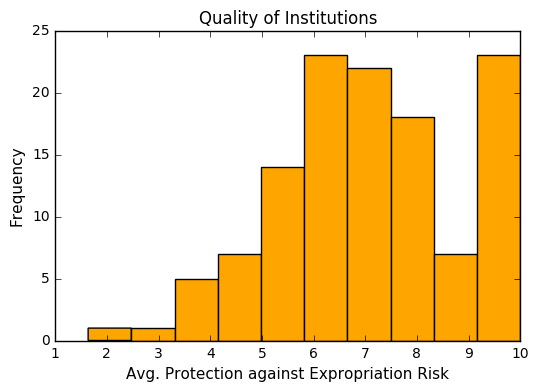

In [5]:
import pylab
s = pd.Series(Data_descriptive_stats.avexpr)
p = s.plot(kind='hist', color='orange')
pylab.rc("axes", linewidth=1.0)
pylab.rc("lines", markeredgewidth=1.0) 
pylab.xticks(fontsize=10)
pylab.yticks(fontsize=10)
plt.xlabel ('Avg. Protection against Expropriation Risk', fontsize=11)
plt.ylabel ('Frequency', fontsize=11)
plt.title ('Quality of Institutions', fontsize=12)
plt.show()

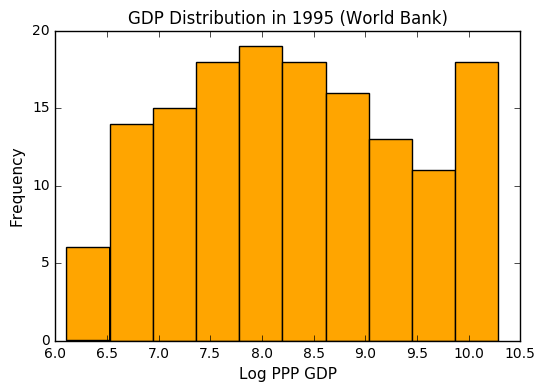

In [6]:
s = pd.Series(Data_descriptive_stats.logpgp95)
p = s.plot(kind='hist', color='orange')
pylab.rc("axes", linewidth=1.0)
pylab.rc("lines", markeredgewidth=1.0) 
pylab.xticks(fontsize=10)
pylab.yticks(fontsize=10)
plt.xlabel ('Log PPP GDP', fontsize=11)
plt.ylabel ('Frequency', fontsize=11)
plt.title ('GDP Distribution in 1995 (World Bank)', fontsize=12)
plt.show()

### OLS Regression
Before applying the instrumental variable approach, the log per capita income is first regressed on the quality of institutions represented by the protection against expropriation variable in a ordinary least-squares regression. Additionally, we control for several factors such as geographical region and conditions. In mathematical terms, we evaluate
$$
log~y_{i} = \mu + \alpha R_{i} + X^{'}_{i} \gamma + \epsilon_{i}
$$
where:
- $ log~y_{i} $ is the logarithm of the GDP per capita ( `logpgp95` ) between 1975 and 1995;
- $ R_{i} $ is the *average protection against expropriation* ( `avexpr` )  between 1985 and 1995;
- $ X^{'}_{i} $ is a vector of covariates that Acemoglu controls for, e.g.$~$ `africa`,$~$ `lat_abst` ,$~$ `asia` ,$~$ `other`;
- $\epsilon_{i} $ is the random error term.

The results on our coefficient of interest, $ \alpha $, indicate that there is, in fact, a positive and statistically significant correlation between institutional quality and GDP. However, we cannot infer any causal relationship from this result: are rich countries the ones with better institutions or are good institutions the key to a higher per capita GDP? Moreover, geographical characteristics seem to influence the GDP as well. For instance, the regression results show that the GDP of a country is lower when said country is located in Africa or Asia.

In [7]:
Ols_data = pd.read_stata ('OLS.dta')

In [8]:
Ols_data

,shortnam,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco
0,AFG,0.0,0.366667,NaN,NaN,0.0,1.0,NaN,NaN
1,AGO,1.0,0.136667,5.363636,7.770645,0.0,0.0,-3.411248,1.0
2,ARE,0.0,0.266667,7.181818,9.804219,0.0,1.0,NaN,NaN
3,ARG,0.0,0.377778,6.386364,9.133459,0.0,0.0,-0.872274,1.0
4,ARM,0.0,0.444444,NaN,7.682482,0.0,1.0,NaN,NaN
5,AUS,0.0,0.300000,9.318182,9.897972,1.0,0.0,-0.170788,1.0
6,AUT,0.0,0.524444,9.727273,9.974877,0.0,0.0,-0.343900,NaN
7,AZE,0.0,0.447778,NaN,7.306531,0.0,1.0,NaN,NaN
8,BDI,1.0,0.036667,NaN,6.565265,0.0,0.0,-3.506558,NaN
9,BEL,0.0,0.561111,9.681818,9.992871,0.0,0.0,-0.179127,NaN


In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
results = smf.ols('logpgp95 ~ avexpr + africa + asia + lat_abst + other', data=Ols_data).fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     52.74
Date:                Tue, 31 Jan 2017   Prob (F-statistic):           4.18e-27
Time:                        18:22:16   Log-Likelihood:                -102.45
No. Observations:                 111   AIC:                             216.9
Df Residuals:                     105   BIC:                             233.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.8511      0.340     17.230      0.000         5.178     6.524
avexpr         0.3896      0.051      7.691      0.000         0.289     0.490
africa        -0.9164      0.166     -5.511      0.000        -1.246    -0.587
asia          -0.1531      0.155     -0.989      0.325        -0.460     0.154
lat_abst       0.3326      0.445      0.747      0.457        -0.551     1.216
other          0.3035      0.375      0.810      0.420        -0.440     1.047
==============================================================================
Omnibus:                        4.342   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.936
Skew:                          -0.457   Prob(JB):                        0.140
Kurtosis:                       3.126   Cond. No.                         58.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### First-stage
Now, we turn to the analytical method that promises to yield valid insights regarding the research question. In the first stage of the instrumental variable (IV) analysis, the treatment variable is regressed on the instrumental variable. Here, the selected instrumental variable are the mortality rates faced by European settlers in colonial times since they are easy to measure and arguably exogenous - a necessary condition in the isolation of the effect the treatment variable has on the outcome variable. In particular we want to regress

$$
R_i = \zeta + \beta log M_i + X^{'}_{i} \delta + u_i
$$

where $log M_i$ is the *logaritm of European settlers' mortality* (`logem4`) and $u_{i} $ is the random error term. Note that $log M_i$ is the instrument used to predict the *average protection against expropriation risk* which will be employed in the <a id=f3 href=#a3>second stage</a> to calculate our coefficient of interest, $\alpha$.

When regressing the institution quality on the colonists' mortality rates between the XVII and XIX century, we obtain a strong first stage, meaning that there is a significantly strong negative correlation between the two variables (taken as logs). In particular, a higher settler mortality rate is correlated with a lower institution quality. As a result, the pattern in the relationship between the two factors seems to be following the path theorised by Acemoglu, Johnson and Robinson: <br />

| N. | Correlation |
| --- | ----------- |  
| 1. | `potential settler mortality rates` major determinant in `settlements`<sup id=a1>[[1]](#f1)</sup>
| 2. | `settlements` major determinant in `institutions in 1900`|
| 3. | `institutions in 1900` major determinant in `institutions today`|



In [12]:
Data_first_stage = pd.read_stata ('1st-stage.dta')

In [13]:
Data_first_stage 

,lat_abst,euro1900,excolony,avexpr,logpgp95,cons1,indtime,democ00a,cons00a,extmort4,logem4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,28.000000,0.0,5.000000,NaN,3.0,154.0,1.0,3.0,78.099998,4.357990
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
First_stage = smf.ols('avexpr ~ logem4', data=Data_first_stage).fit()

In [15]:
First_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 avexpr   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     30.99
Date:                Tue, 31 Jan 2017   Prob (F-statistic):           4.08e-07
Time:                        18:22:17   Log-Likelihood:                -126.60
No. Observations:                  75   AIC:                             257.2
Df Residuals:                      73   BIC:                             261.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.4925      0.550     17.263      0.000         8.397    10.588
logem4        -0.6441      0.116     -5.567      0.000        -0.875    -0.413
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.873
Skew:                          -0.021   Prob(JB):                        0.646
Kurtosis:                       2.473   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### Exclusion Restriction
In order for the instrumental variable regression method to be valid, the so-called *exclusion restriction* has to be fulfilled. Said condition requires the instrumental variable to influence the outcome of interest only via the treatment variable. It is fairly straightforward that the colonists' expected mortality rates between the seventeenth and nineteenth century (our instrument) are in no way directly related to nowadays economic performance, the outcome variable, in each specific country. In fact, the only concern that might arise relates to current diseases: in such case, the instrument's effect on GDP might be a mere reflection of the disease environment and not a consequence of the country's quality of institutions. However, it has been shown that the colonists' mortality rates were maily due to their lack of immunity against diseases such as malaria and yellow fever, immunity that had been developed by the indigenous population over the centuries. It is therefore unlikely that such diseases take a central role in causing some former colonies to be extremely poor. Hence,  
> "The advantage of our approach is that conditional on the variables that we already control for, settler mortality more than 100 years ago should have no effect on output today, other than through its effect on institutions."                                                                                           
> _Acemoglu et al., 2001_

### Second-stage
In the second stage of the IV regression analysis, the impact of institutions on income per capita is estimated. Since it is not possible to reproduce the instrumental variable regression command that the authors apply with the python software, we conduct the second-stage analysis using the OLS regression as before. In the original paper, Acemoglu et al. replicate the second stage of the analysis with the ordinary least-squares method as well as shown in <a id="a2" href=#f2>Table 5</a>. In particular, we estimate the following equation

$$
log~y_{i} = \mu + \alpha \hat{R}_{i} + X^{'}_{i}\gamma + \epsilon_{i}
$$

where 
- $\hat{R}_{i}$ is the value of *average expropriation risk* obtained in the <a id=a3 href=#f3>first stage</a>;
- $\alpha$ is our coefficient of interest, i.e. it represents the causal relationship running between quality of institutions and per capita GDP;
- $X^{'}_{i}$ is the matrix containing covariates that the authors control for, e.g. `lat_abst`, `f_brit`, `f_french`, `sjlofr` in the following table;
- $\epsilon_{i} $ is the random error term.


The regression results match the ones of the paper and show a highly significant positive correlation between the type and quality of institutions and the level of income in the investigated countries (0.4761). It can be seen that the effect is even larger than estimated in the predictive OLS regression above (0.3896). These findings support the initial expectations in which more extensive and higher quality institutions lead to an overall better economic performance.

In [16]:
Data_IV_reg = pd.read_stata ('IV-REG-additional-controls.dta')

In [17]:
Data_IV_reg

,shortnam,catho80,muslim80,lat_abst,no_cpm80,f_brit,f_french,avexpr,sjlofr,logpgp95,logem4,baseco
0,AFG,0.000000,99.300003,0.366667,0.699997,1.0,0.0,NaN,1.0,NaN,4.540098,NaN
1,AGO,68.699997,0.000000,0.136667,11.500004,0.0,0.0,5.363636,1.0,7.770645,5.634789,1.0
2,ARE,0.400000,94.900002,0.266667,4.399999,1.0,0.0,7.181818,0.0,9.804219,NaN,NaN
3,ARG,91.599998,0.200000,0.377778,5.500001,0.0,0.0,6.386364,1.0,9.133459,4.232656,1.0
4,ARM,0.000000,0.000000,0.444444,100.000000,0.0,0.0,NaN,0.0,7.682482,NaN,NaN
5,AUS,29.600000,0.200000,0.300000,46.700001,1.0,0.0,9.318182,0.0,9.897972,2.145931,1.0
6,AUT,88.800003,0.600000,0.524444,4.099997,0.0,0.0,9.727273,0.0,9.974877,NaN,NaN
7,AZE,0.000000,93.400002,0.447778,6.599998,0.0,0.0,NaN,0.0,7.306531,NaN,NaN
8,BDI,78.300003,0.900000,0.036667,15.899997,0.0,0.0,NaN,1.0,6.565265,5.634789,NaN
9,BEL,90.000000,1.100000,0.561111,8.500000,0.0,0.0,9.681818,1.0,9.992871,NaN,NaN


In [18]:
Second_stage = smf.ols('logpgp95 ~ avexpr + lat_abst + f_brit + f_french + sjlofr', data=Data_IV_reg).fit()


In [19]:
Second_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     42.55
Date:                Tue, 31 Jan 2017   Prob (F-statistic):           9.33e-24
Time:                        18:22:22   Log-Likelihood:                -110.70
No. Observations:                 111   AIC:                             233.4
Df Residuals:                     105   BIC:                             249.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.2941      0.404     10.628      0.000         3.493     5.095
avexpr         0.4761      0.056      8.498      0.000         0.365     0.587
lat_abst       1.2293      0.487      2.525      0.013         0.264     2.195
f_brit         0.3231      0.179      1.808      0.073        -0.031     0.677
f_french      -0.3784      0.202     -1.870      0.064        -0.780     0.023
sjlofr         0.6409      0.176      3.650      0.000         0.293     0.989
==============================================================================
Omnibus:                        8.072   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.916
Skew:                          -0.643   Prob(JB):                       0.0191
Kurtosis:                       3.239   Cond. No.                         59.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
In the presented work, we reproduced the findings of Acemoglu et al. concerning the interdependence between institutions and economic performance of former European colonies. In line with the methodoloy of the original paper, we utilized the two-stage instrumental variable approach in order to isolate exogenous sources of variation in institutions to assess their impact on income per capita. This procedure is crucial in establishing a causal relationship between the two investigated variables of interest, which, in turn, allows for the inference of valid outcomes. The results we obtained in the regression analyses state a large and statistically significant effect of institutional structure on economic performance measured by GDP. Naturally, there are many questions that presented paper does not cover and which could be studied in further scientific research. However, the given findings present valuable insights into the determinants of a country's economic efficiency and therefore wealth.

********************
#### Notes

<a id=f1 href=#a1>[1]</a>: The Pilgrim Fathers decided to emigrate to the U.S. instead of Guyana because of their awareness about mortality rates in the latter country.  

**********
#### Tables

- <a id=f4 href=#a4>Appendix Table A1</a> Gives an in-depth description of data and sources in Acemoglu et al., 2001.

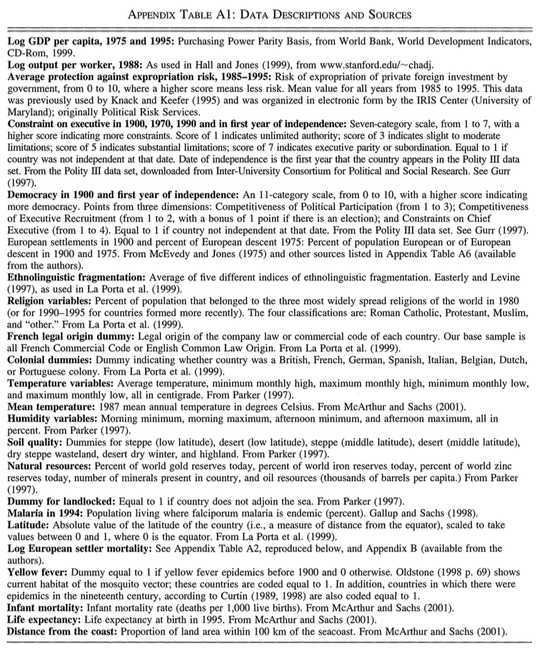

In [20]:
from IPython.display import Image, display
display(Image(filename='A1.png'))

- <a id="f2">[Table 5](#a2)</a> replicates the IV regression results in obtained by Acemoglu et al., 2001.

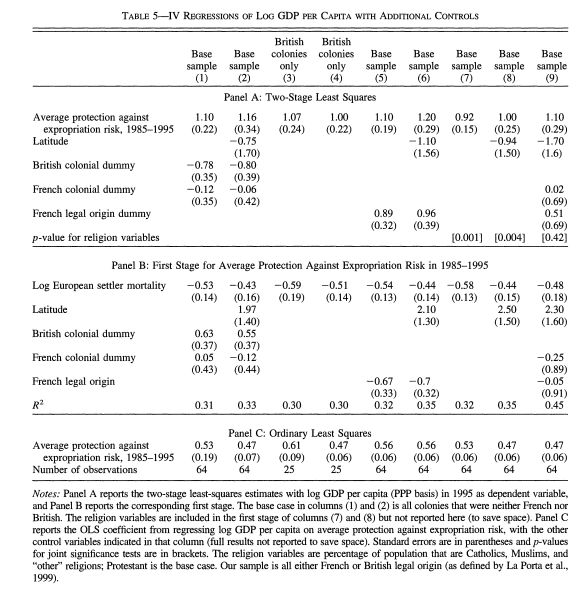

In [21]:
from IPython.display import Image, display
display(Image(filename='Table1.png'))